In [1]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Get the current directory of the notebook
current_dir = os.getcwd()

# Construct the absolute path to the dataset folder
dataset_dir = os.path.abspath(os.path.join(current_dir, 'dataset'))

# Construct the absolute path to train.csv
train_csv_path = os.path.join(dataset_dir, 'train.csv')

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(train_csv_path)

print(df.info())
print(df.head())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

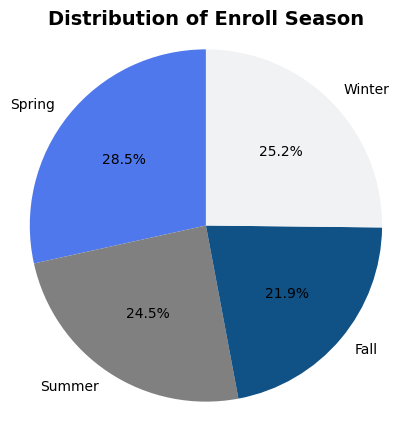

In [6]:
# Define the order of seasons
order = ['Spring', 'Summer', 'Fall', 'Winter']

# Convert the column to a categorical type with the specified order
df['Basic_Demos-Enroll_Season'] = pd.Categorical(df['Basic_Demos-Enroll_Season'], categories=order, ordered=True)

# Calculate the value counts and sort them by the specified order
season_counts = df['Basic_Demos-Enroll_Season'].value_counts().sort_index()

# Plot the pie chart
plt.figure(figsize=(5, 5))
season_counts.plot(kind='pie',
                   autopct='%1.1f%%',  # Display percentages with one decimal
                   startangle=90,  # Rotate the pie for better readability
                   colors=['#4f78ec', 'grey', '#105186', '#F0F2F3'],  # Custom colors for the pie
                   labels=season_counts.index,
                   ylabel='')  # Use season names as labels

# Add a title
plt.title('Distribution of Enroll Season', fontsize=14, weight='bold')

# Ensure the pie chart is a circle
plt.axis('equal')

# Show the plot
plt.show()

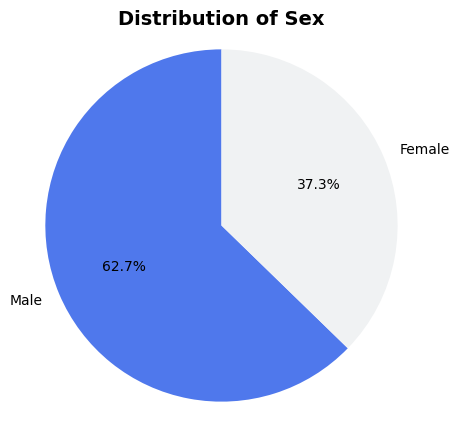

In [7]:
# Calculate the value counts for sex
sex_counts = df['Basic_Demos-Sex'].value_counts().sort_index()

if sex_counts.empty or sex_counts.isnull().any():
    print("Error: 'Basic_Demos-Sex' column contains invalid or missing data.")

# Define custom labels for the pie chart
labels = ['Male', 'Female']

# Define colors for the pie chart
colors = ['#4f78ec', '#F0F2F3']  # Custom colors for better visualization

# Plot the pie chart
plt.figure(figsize=(5, 5))
sex_counts.plot(
    kind='pie',
    autopct='%1.1f%%',  # Display percentages with one decimal
    startangle=90,  # Rotate the pie chart for better readability
    colors=colors,  # Use custom colors
    labels=labels,  # Use custom labels for the chart
    ylabel=''  # Remove the default "count" label
)

# Add a title
plt.title('Distribution of Sex', fontsize=14, weight='bold')

# Ensure the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()

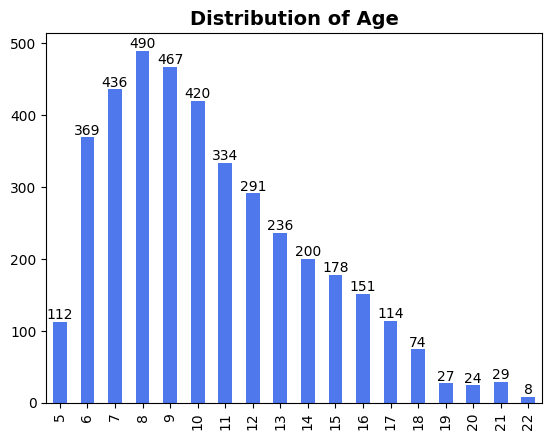

<Figure size 500x500 with 0 Axes>

In [8]:
# Plot the distribution of age
ax = df['Basic_Demos-Age'].value_counts().sort_index().plot(kind='bar', color='#4f78ec')
plt.title('Distribution of Age', fontsize=14, weight='bold')
plt.xlabel('')
#plt.ylabel('Frequency')

plt.figure(figsize=(5, 5))
# Annotate each bar with its height
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at the center of the bar
                ha='center', va='bottom')  # Center alignment

# Show the plot
plt.show()

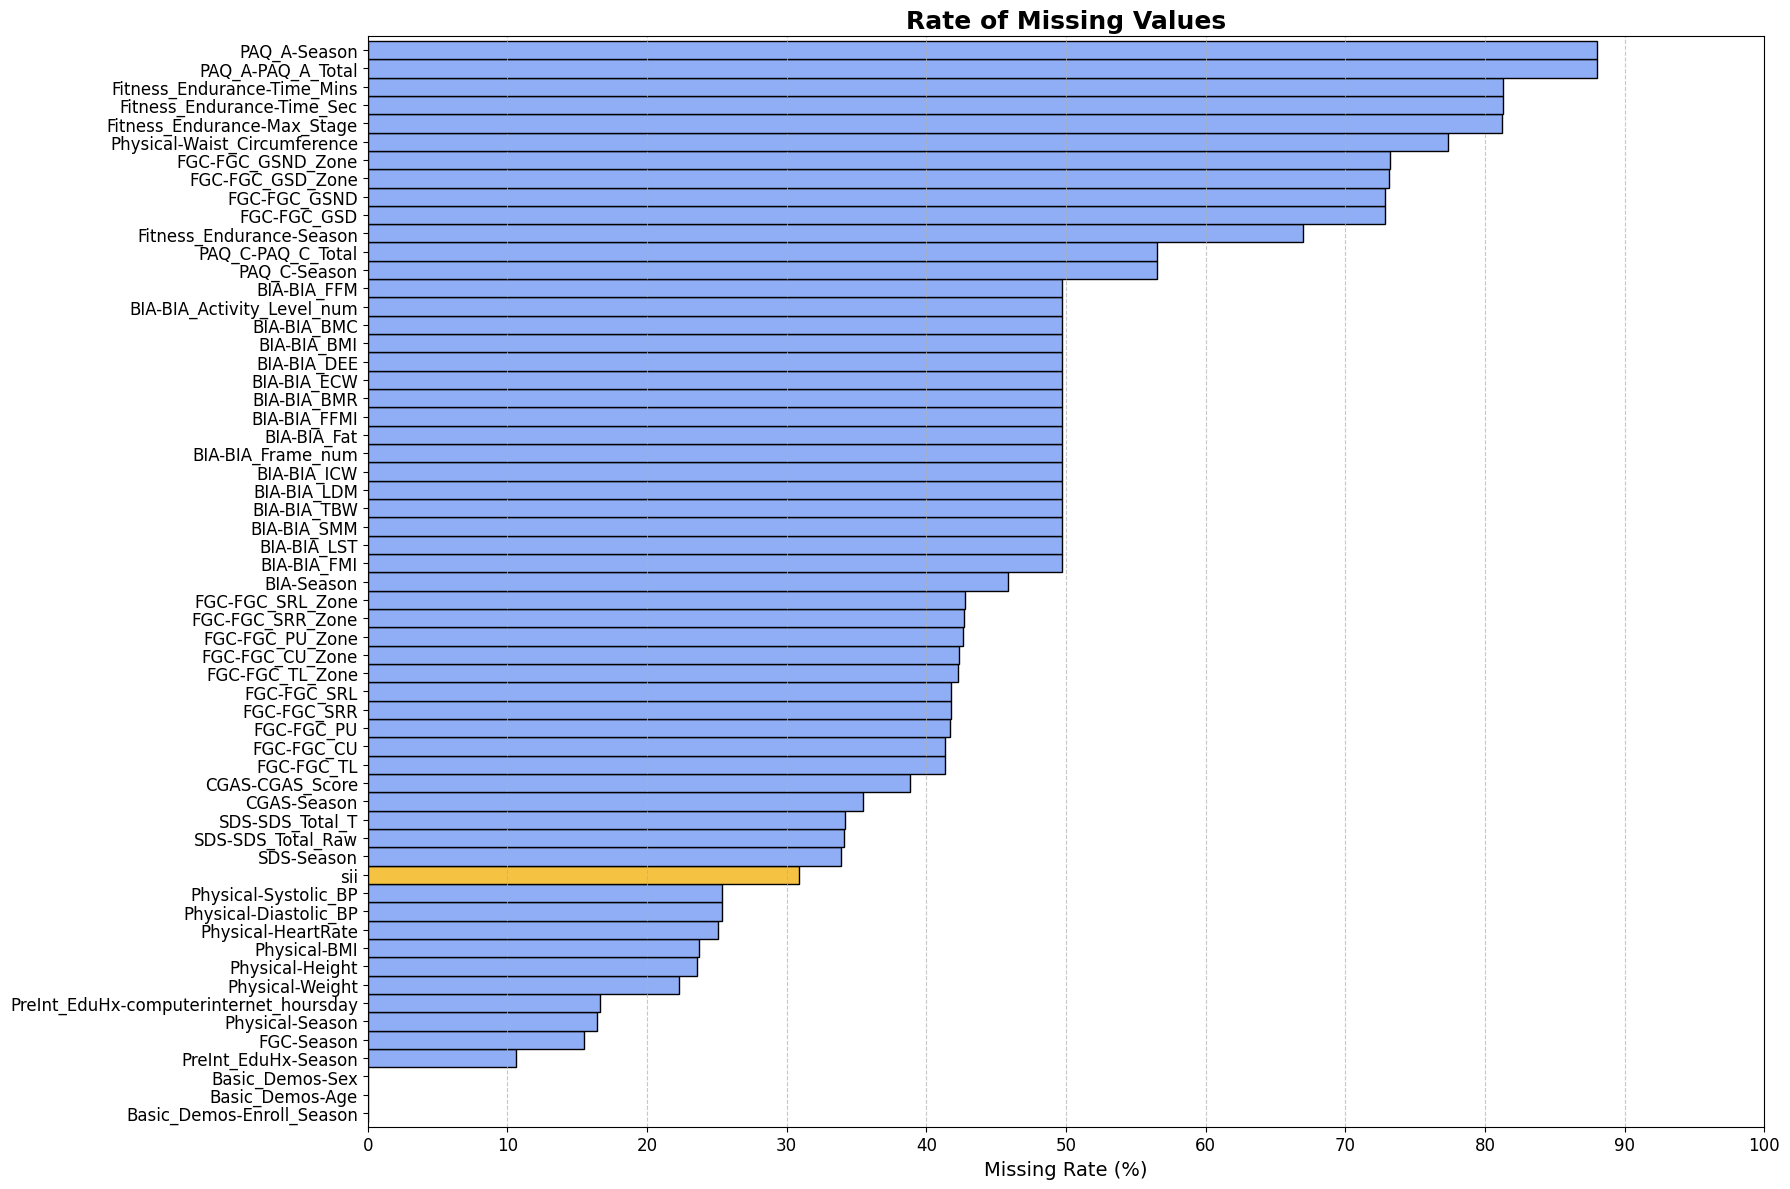

In [5]:
# Dynamically exclude features containing the word "season" and the "id" column
exclude_cols = ["id"] + ["PCIAT-Season", "PCIAT-PCIAT_01", "PCIAT-PCIAT_02", "PCIAT-PCIAT_03", "PCIAT-PCIAT_04", "PCIAT-PCIAT_05", "PCIAT-PCIAT_06", "PCIAT-PCIAT_07", "PCIAT-PCIAT_08", "PCIAT-PCIAT_09", "PCIAT-PCIAT_10", "PCIAT-PCIAT_11", "PCIAT-PCIAT_12", "PCIAT-PCIAT_13", "PCIAT-PCIAT_14", "PCIAT-PCIAT_15", "PCIAT-PCIAT_16", "PCIAT-PCIAT_17", "PCIAT-PCIAT_18", "PCIAT-PCIAT_19", "PCIAT-PCIAT_20", "PCIAT-PCIAT_Total"]

# Calculate missing rates
missing_rate = df.drop(columns=exclude_cols).isnull().mean() * 100 

# Sort the features by the missing rate in descending order
missing_rate_sorted = missing_rate.sort_values(ascending=True)

# Define colors for labelCols and other features
colors = [
    '#f5c242' if col == 'sii' else
    #'#4f78ec' if col == 'Accelerometer (Time series)' else
    '#8faef5'
    for col in missing_rate_sorted.index
]

# Plot the missing rates
plt.figure(figsize=(18, 12))
missing_rate_sorted.plot(kind='barh', color=colors, edgecolor='black', width=1)

# Add titles and labels
plt.title('Rate of Missing Values', fontsize=18, weight='bold')
#plt.ylabel('Features/Label', fontsize=14)
plt.xlabel('Missing Rate (%)', fontsize=14)
plt.xticks(np.arange(0, 101, 10), fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

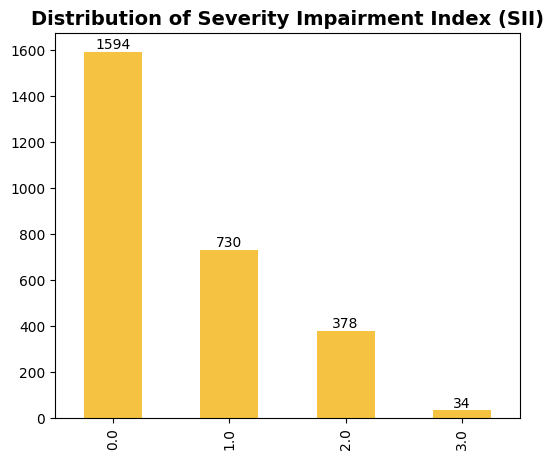

In [10]:
# Plot the bar chart
plt.figure(figsize=(6, 5))
ax = df['sii'].value_counts().plot(kind='bar', color='#f5c242')
plt.title('Distribution of Severity Impairment Index (SII)', fontsize=14, weight='bold')
plt.xlabel('')
plt.ylabel('')

# Annotate each bar with its height
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at the center of the bar
                ha='center', va='bottom')  # Center alignment

# Show the plot
plt.show()

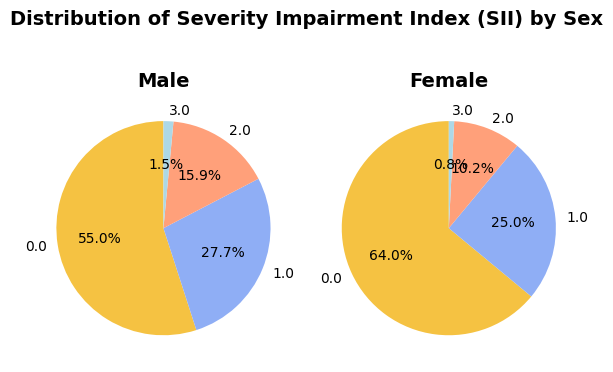

In [11]:
# Define the mapping for sexes
sex_mapping = {0: "Male", 1: "Female"}

# Get unique sexes from the dataset
sexes = df['Basic_Demos-Sex'].unique()
num_sexes = len(sexes)

# Create a figure for multiple pie charts
fig, axes = plt.subplots(1, num_sexes, figsize=(6, 4))

# Define colors for each sii value
colors = ['#f5c242', '#8faef5', '#FFA07A', '#add8e6', '#d3d3d3', '#171c1d']

# Plot pie charts for each sex
for i, sex in enumerate(sexes):
    # Filter data for the current sex
    sex_data = df[df['Basic_Demos-Sex'] == sex]['sii'].value_counts(normalize=True).sort_index()

    # Create the pie chart
    axes[i].pie(
        sex_data,
        labels=sex_data.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors
    )
    # Use the mapped title for clarity
    axes[i].set_title(f"{sex_mapping[sex]}", fontsize=14, weight='bold')

# Add a main title
fig.suptitle("Distribution of Severity Impairment Index (SII) by Sex", fontsize=14, weight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title
plt.show()

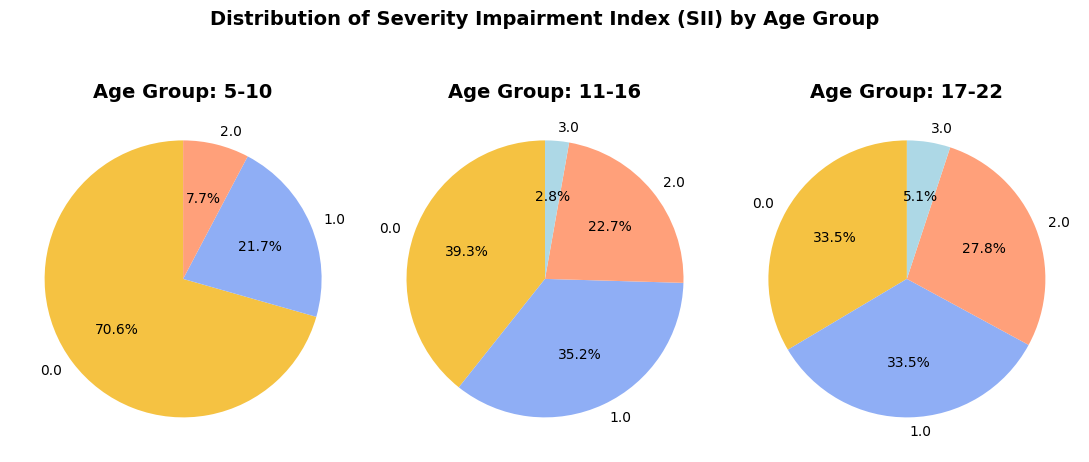

In [12]:
# Define age groups (bins)
bins = [5, 10, 16, 22]
labels = ['5-10', '11-16', '17-22']
df['Age_Group'] = pd.cut(df['Basic_Demos-Age'], bins=bins, labels=labels, right=True)

# Create a figure for multiple pie charts
age_groups = df['Age_Group'].unique().categories  # Get unique age groups
num_groups = len(age_groups)
fig, axes = plt.subplots(1, num_groups, figsize=(11, 5))

# Define colors for each sii value
colors = ['#f5c242', '#8faef5', '#FFA07A', '#add8e6', '#d3d3d3', '#171c1d']

# Plot pie charts for each age group
for i, age_group in enumerate(age_groups):
    # Filter data for the current age group
    group_data = df[df['Age_Group'] == age_group]['sii'].value_counts(normalize=True).sort_index()

    # Create the pie chart
    axes[i].pie(
        group_data,
        labels=group_data.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors
    )
    axes[i].set_title(f"Age Group: {age_group}", fontsize=14, weight='bold')

# Add a main title
fig.suptitle("Distribution of Severity Impairment Index (SII) by Age Group", fontsize=14, weight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title
plt.show()

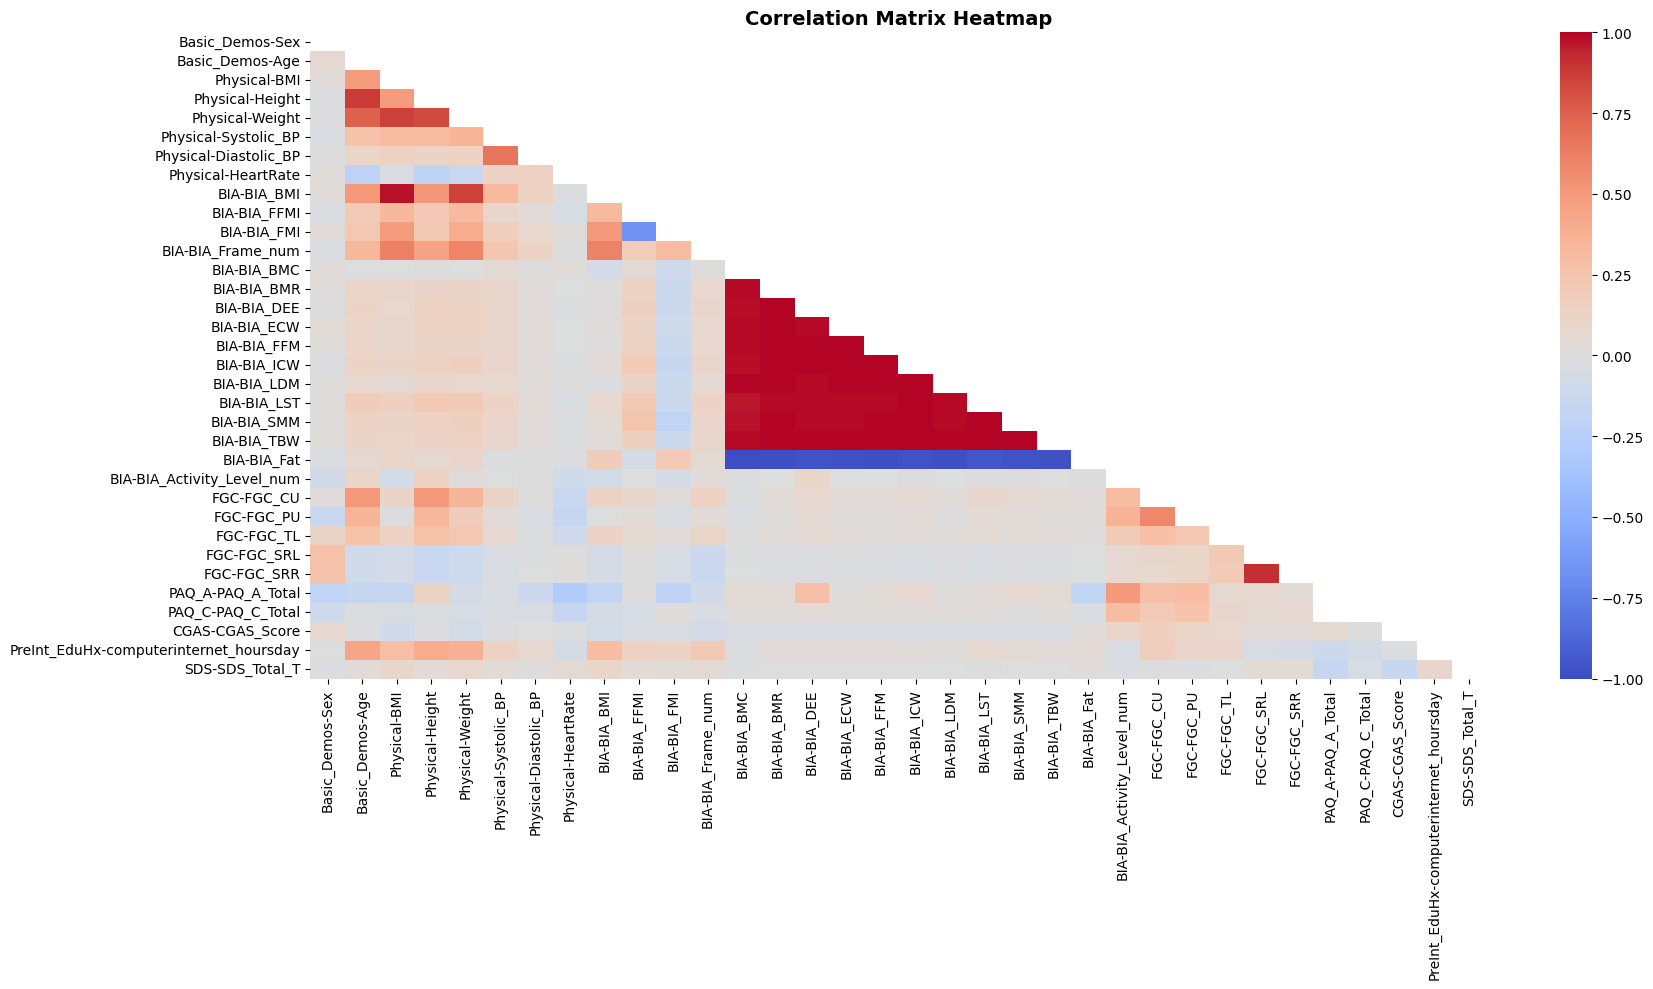

In [13]:
# Keep only numeric columns
cols = [
    "Basic_Demos-Sex",
    "Basic_Demos-Age",
    "Physical-BMI",
    "Physical-Height",
    "Physical-Weight",
    "Physical-Systolic_BP",
    "Physical-Diastolic_BP",
    "Physical-HeartRate",
    "BIA-BIA_BMI",
    "BIA-BIA_FFMI",
    "BIA-BIA_FMI",
    "BIA-BIA_Frame_num",
    "BIA-BIA_BMC",
    "BIA-BIA_BMR",
    "BIA-BIA_DEE",
    "BIA-BIA_ECW",
    "BIA-BIA_FFM",
    "BIA-BIA_ICW",
    "BIA-BIA_LDM",
    "BIA-BIA_LST",
    "BIA-BIA_SMM",
    "BIA-BIA_TBW",
    "BIA-BIA_Fat",
    "BIA-BIA_Activity_Level_num",
    "FGC-FGC_CU",
    "FGC-FGC_PU",
    "FGC-FGC_TL",
    "FGC-FGC_SRL",
    "FGC-FGC_SRR",
    "PAQ_A-PAQ_A_Total",
    "PAQ_C-PAQ_C_Total",
    "CGAS-CGAS_Score",
    "PreInt_EduHx-computerinternet_hoursday",
    "SDS-SDS_Total_T",
]
numeric_df = df[cols]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Set a correlation threshold
threshold = 0.8

# Create the original mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(
    correlation_matrix,
    fmt=".2f",   # Format the correlation values to 2 decimal places
    cmap='coolwarm',  # Use a color map to indicate correlation strength
    vmin=-1, vmax=1,  # Correlation ranges from -1 to 1
    mask=mask  # Mask upper triangle
)

plt.title("Correlation Matrix Heatmap", fontsize=14, weight='bold')
plt.tight_layout()  # Automatically adjusts the layout
plt.show()

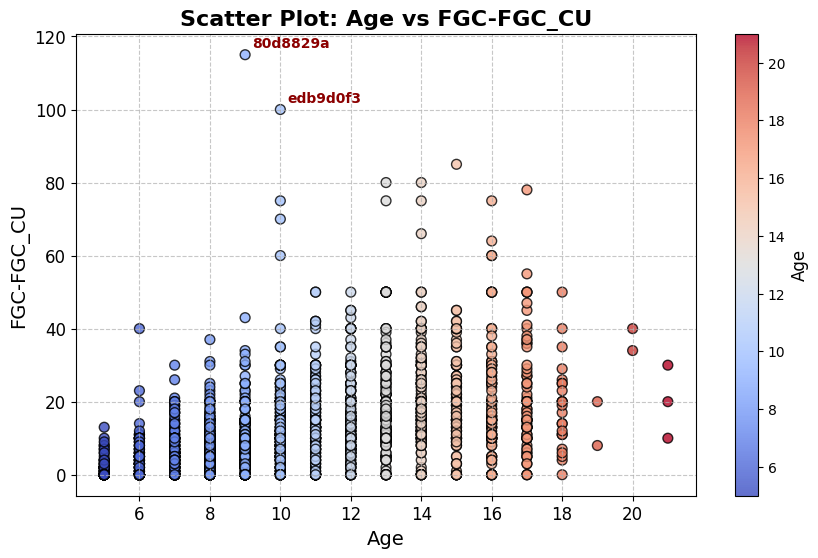

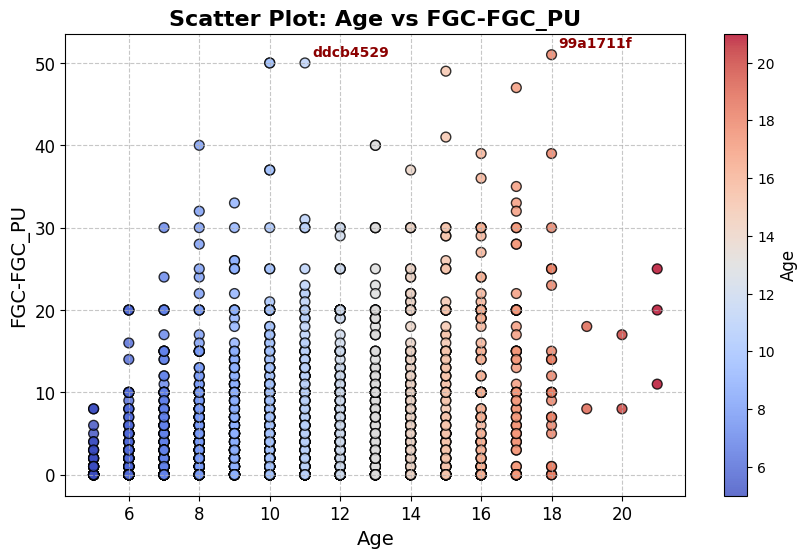

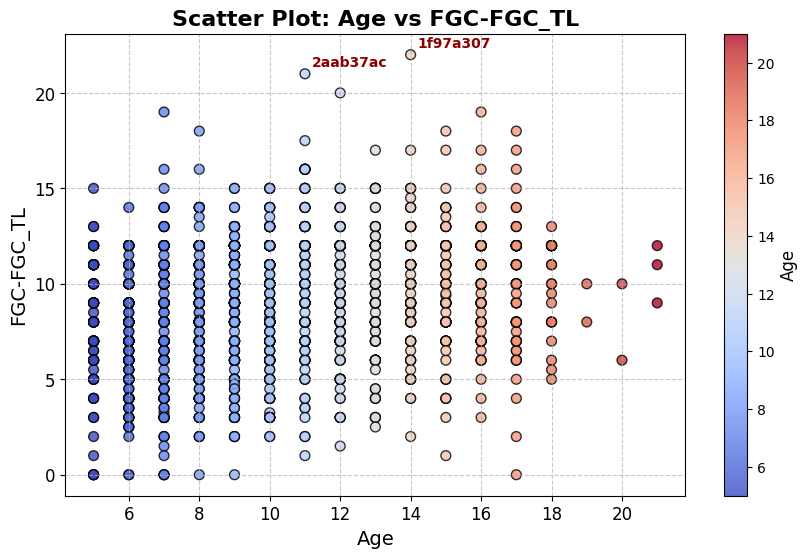

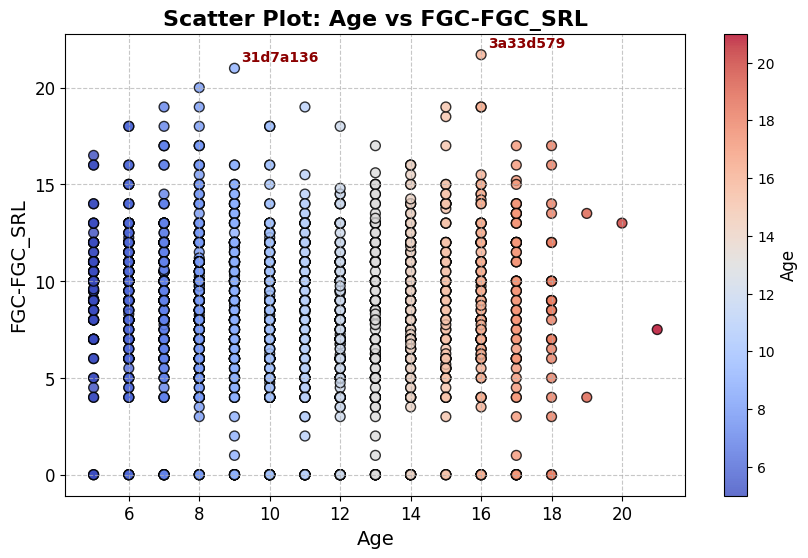

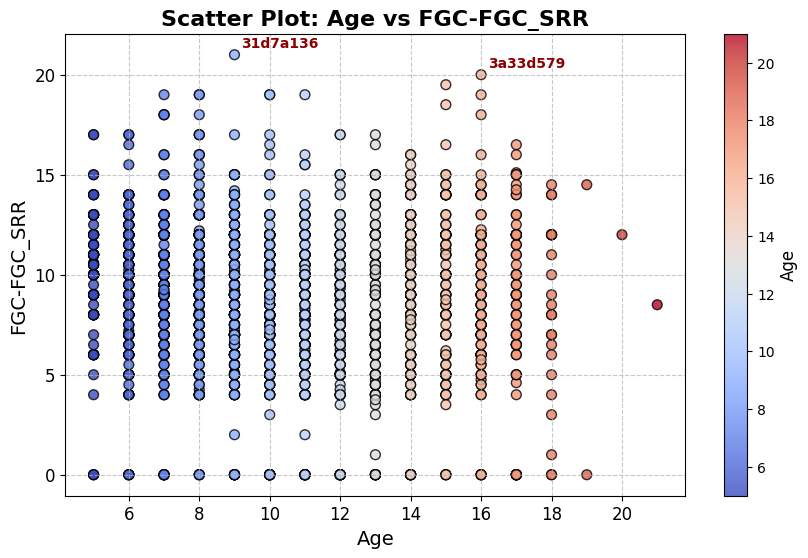

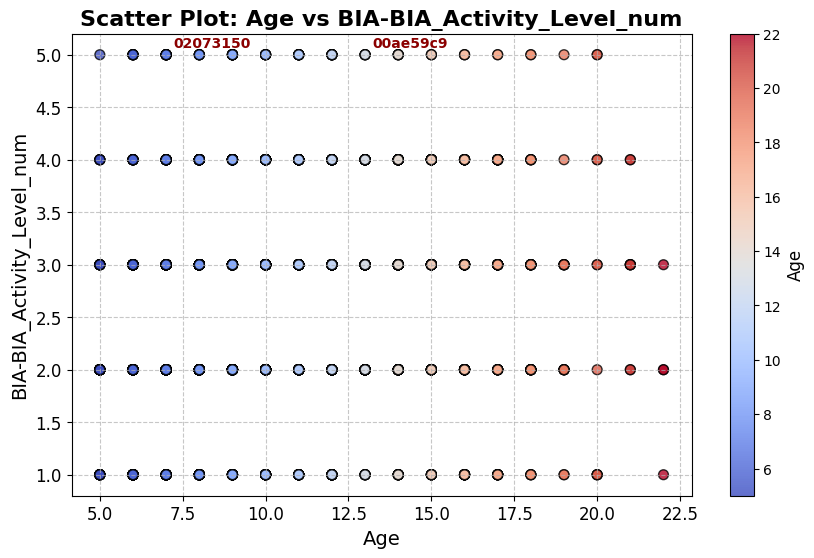

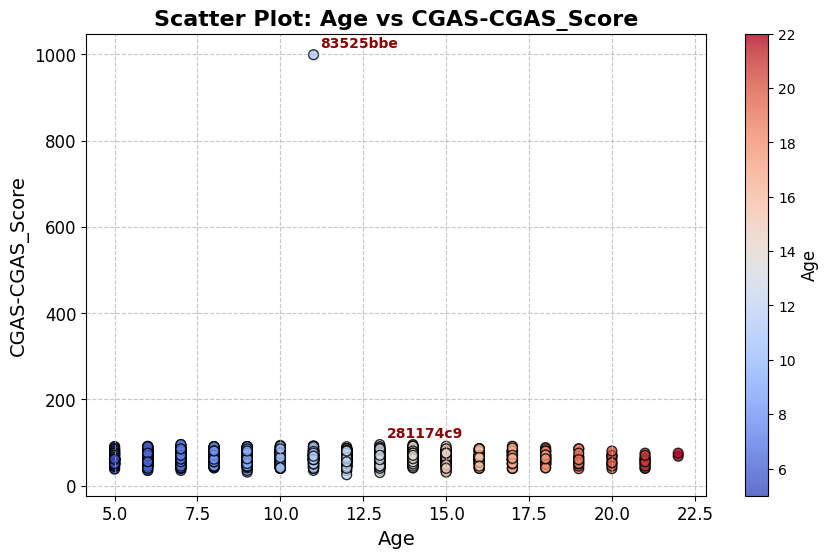

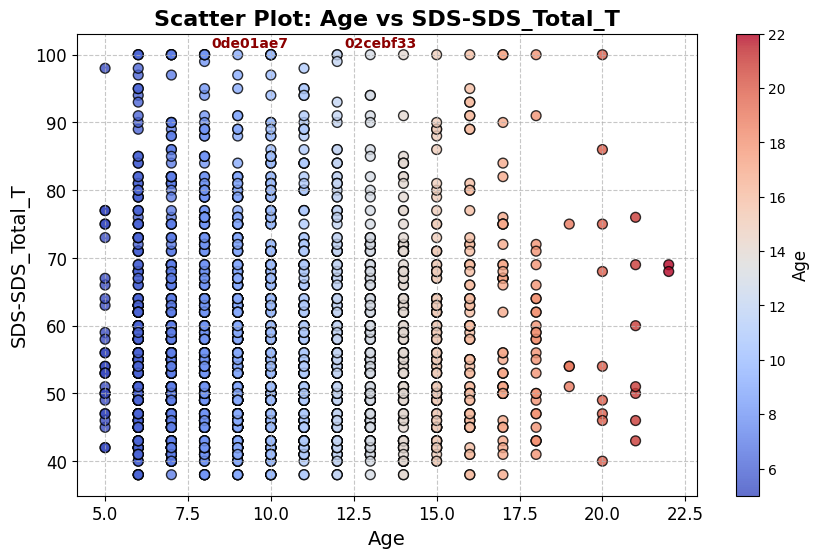

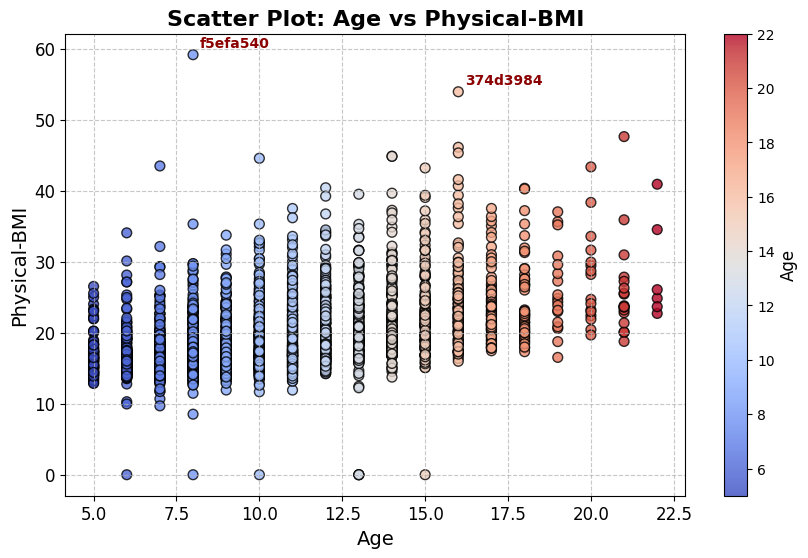

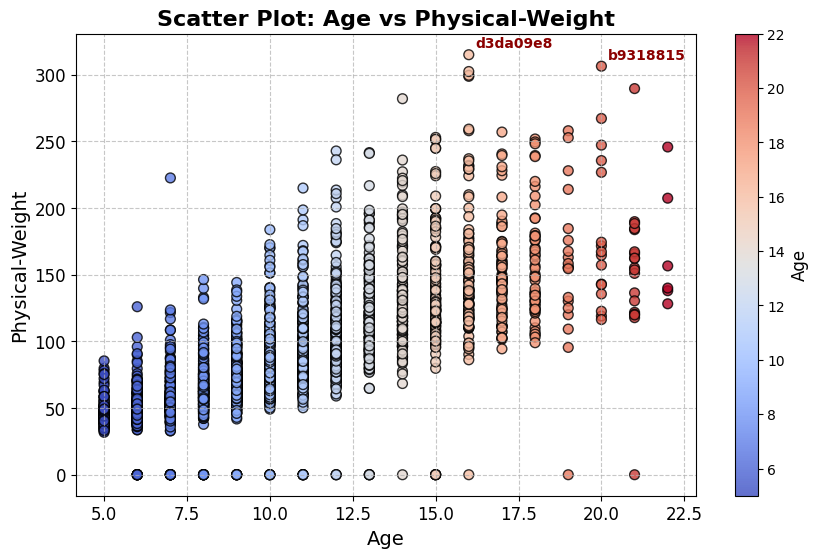

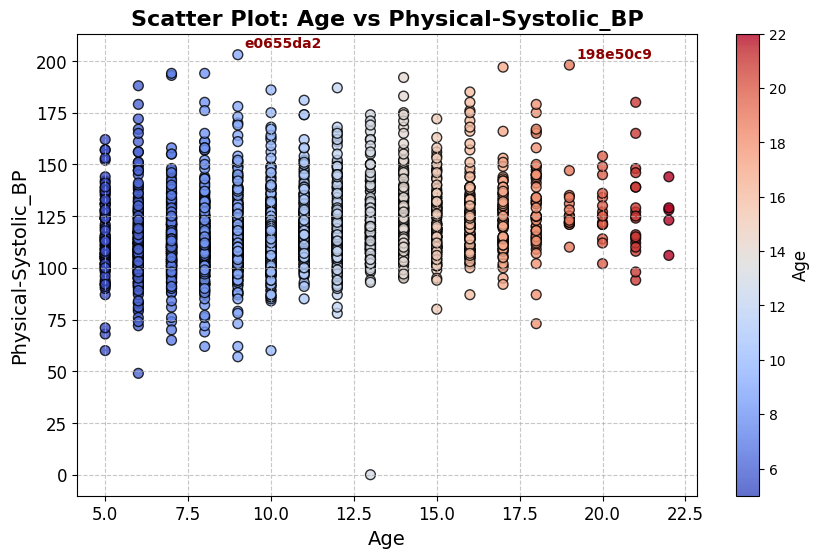

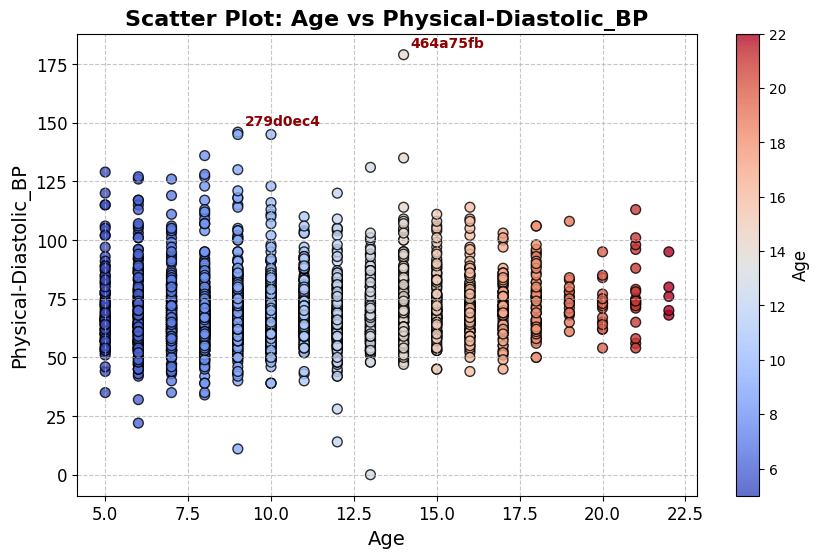

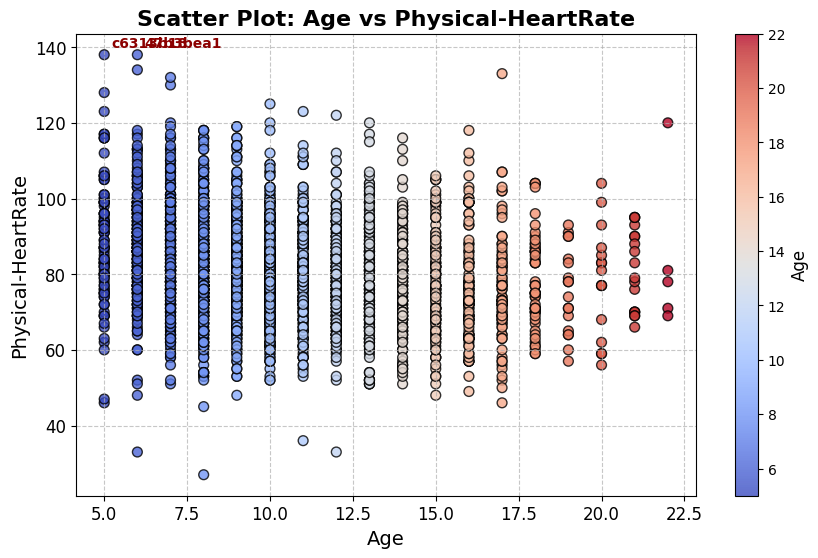

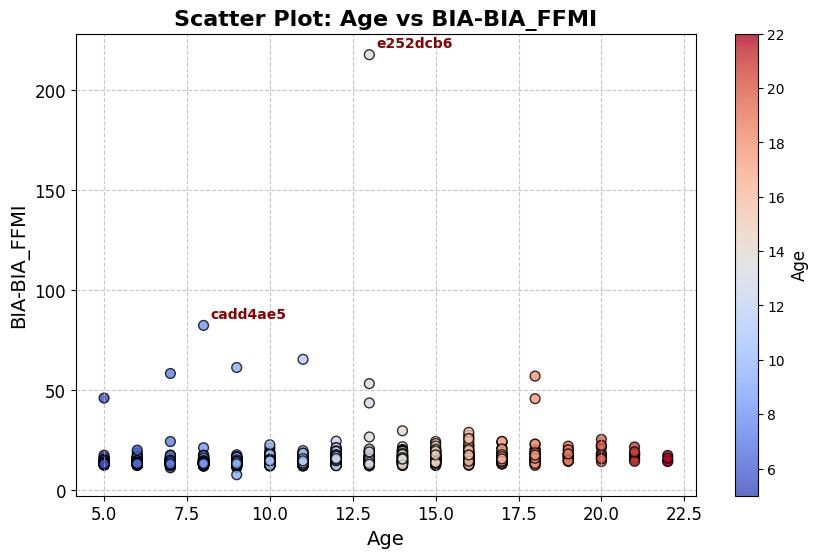

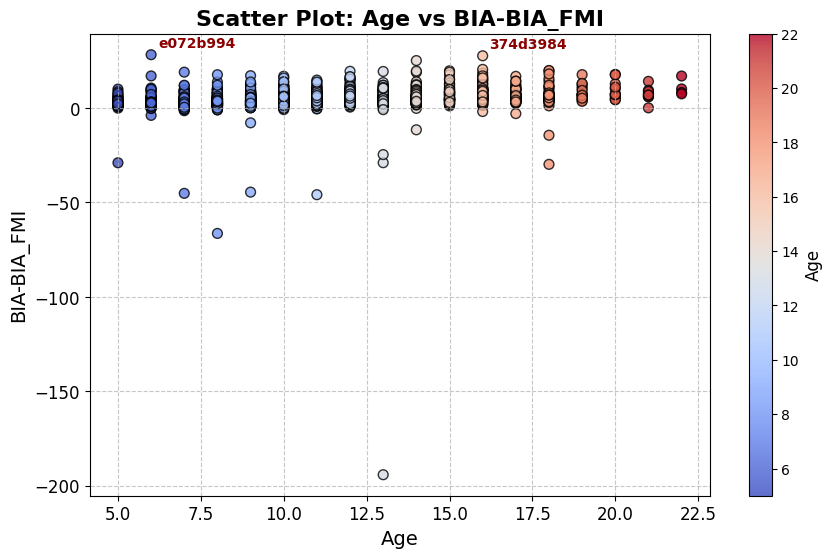

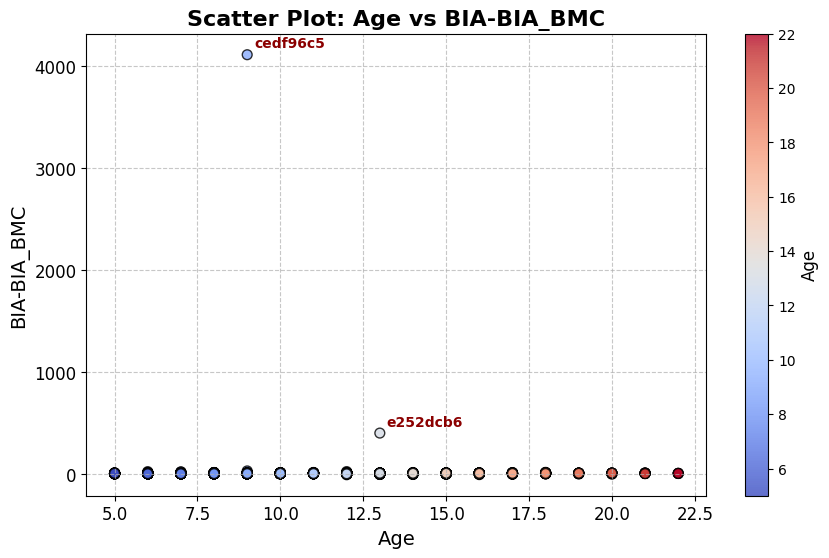

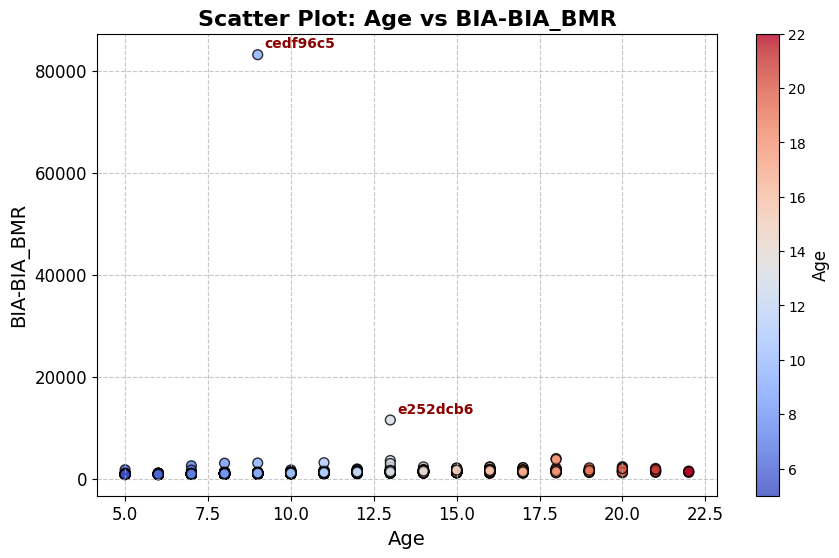

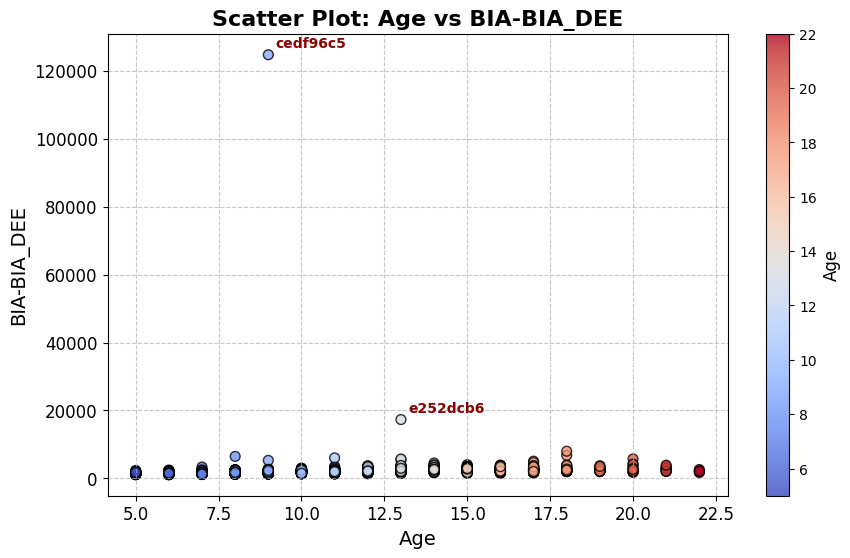

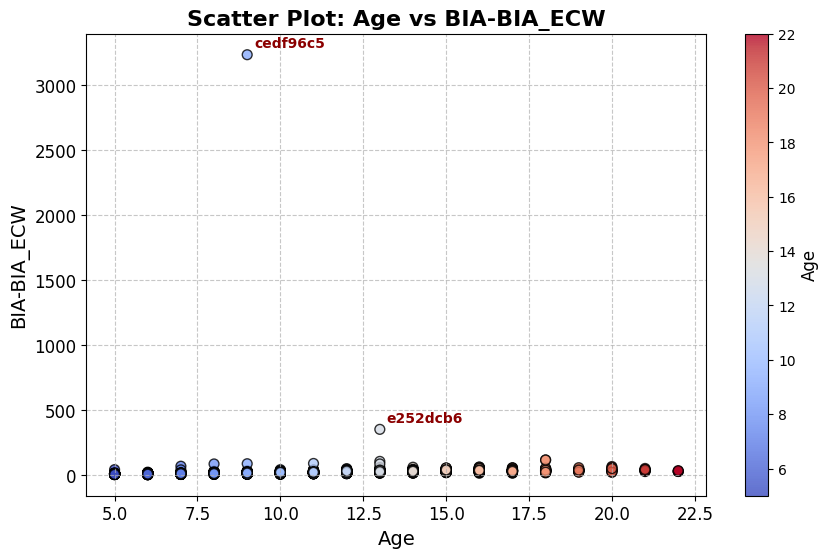

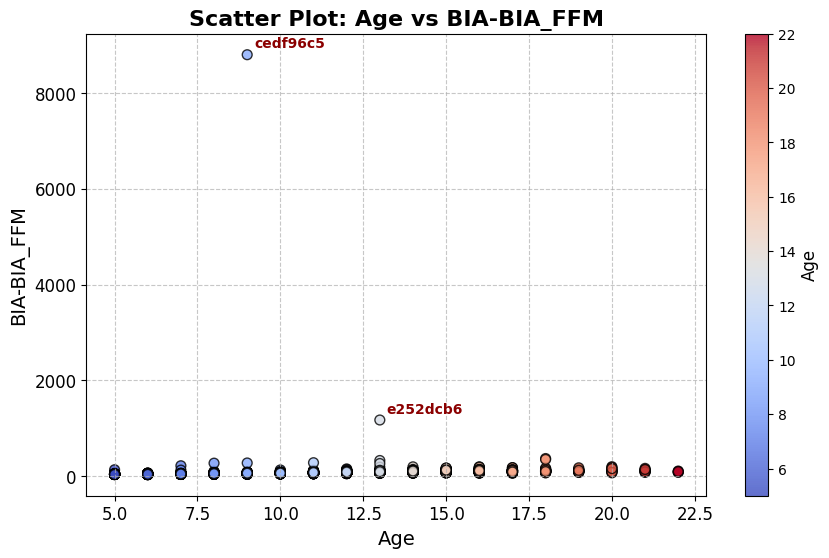

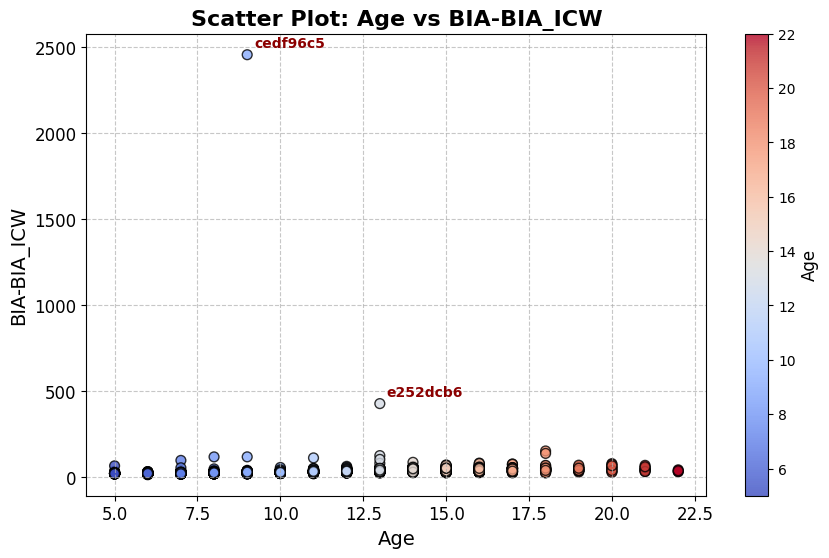

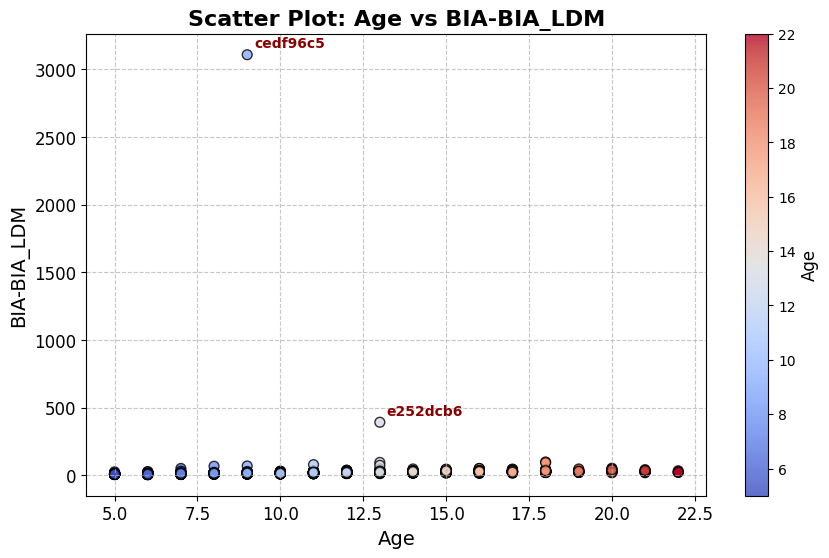

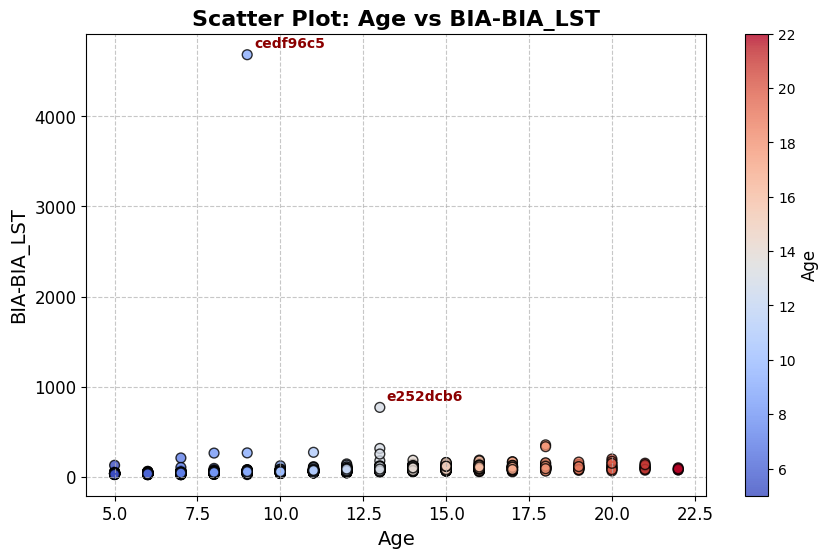

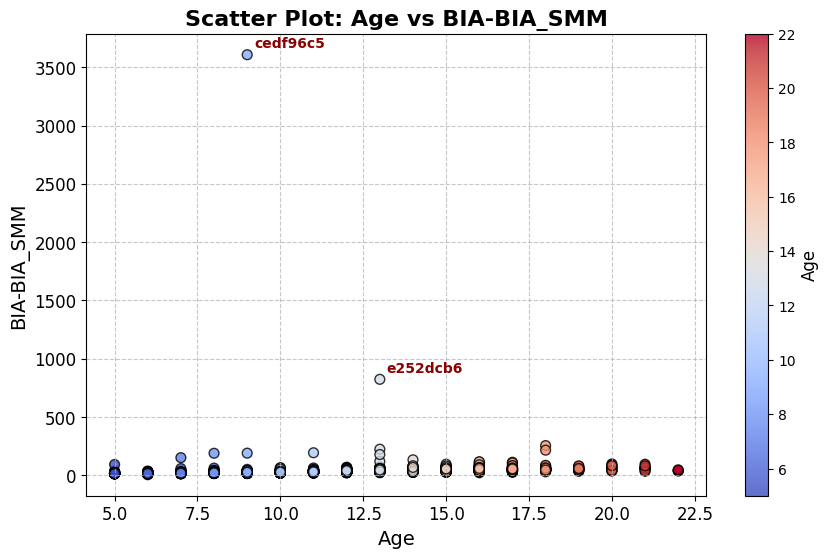

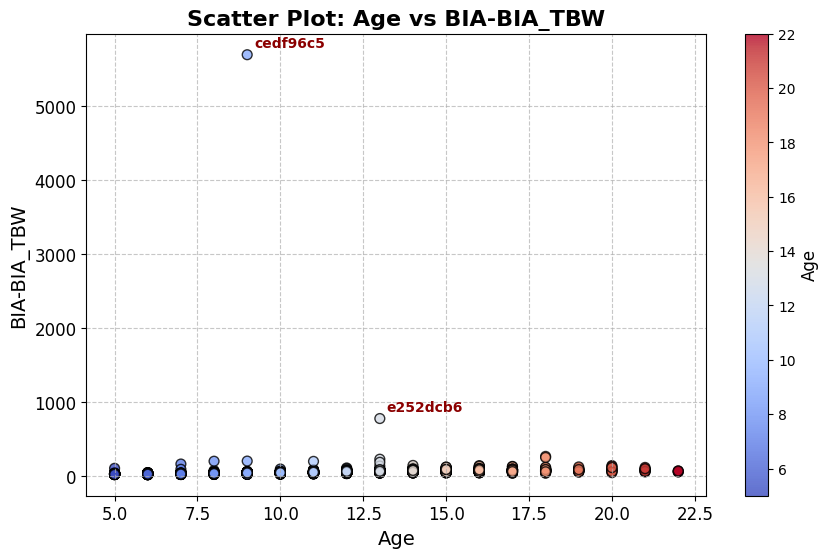

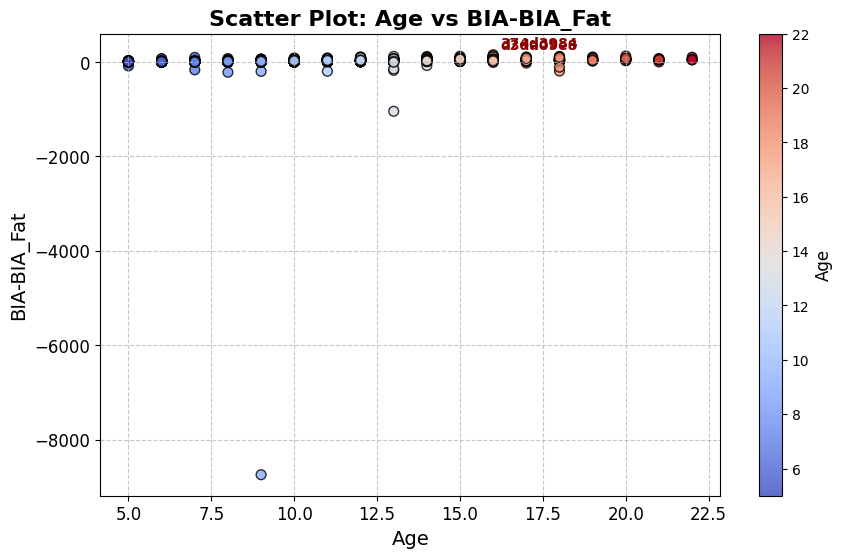

In [14]:
# Select features
selected = [
    "FGC-FGC_CU",
    "FGC-FGC_PU",
    "FGC-FGC_TL",
    "FGC-FGC_SRL",
    "FGC-FGC_SRR",
    "BIA-BIA_Activity_Level_num",
    "CGAS-CGAS_Score",
    "SDS-SDS_Total_T",
    "Physical-BMI",
    "Physical-Weight",
    "Physical-Systolic_BP",
    "Physical-Diastolic_BP",
    "Physical-HeartRate",
    "BIA-BIA_FFMI",
    "BIA-BIA_FMI",
    "BIA-BIA_BMC",
    "BIA-BIA_BMR",
    "BIA-BIA_DEE",
    "BIA-BIA_ECW",
    "BIA-BIA_FFM",
    "BIA-BIA_ICW",
    "BIA-BIA_LDM",
    "BIA-BIA_LST",
    "BIA-BIA_SMM",
    "BIA-BIA_TBW",
    "BIA-BIA_Fat",
]

# Define a color palette for scatter points
palette = sns.color_palette("coolwarm", as_cmap=True)

for c in selected:
    plt.figure(figsize=(10, 6))  # Slightly larger figure for better readability

    # Create the scatter plot with improved aesthetics
    scatter = plt.scatter(
        df['Basic_Demos-Age'],
        df[c],
        c=df['Basic_Demos-Age'],  # Color points by 'Basic_Demos-Age'
        cmap=palette,
        alpha=0.8,
        edgecolor='k',
        s=50,  # Marker size
        label='Data Points'
    )

    # Add a colorbar to indicate the age scale
    cbar = plt.colorbar(scatter)
    cbar.set_label('Age', fontsize=12)

    # Customize the plot
    plt.title(f'Scatter Plot: Age vs {c}', fontsize=16, weight='bold')
    plt.xlabel('Age', fontsize=14)
    plt.ylabel(c, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(linestyle='--', alpha=0.7)  # Subtle dashed grid lines

    # Optional: Annotate a subset of points (e.g., top 10 based on feature value)
    for i in df.nlargest(2, c).index:
        plt.annotate(
            df['id'].iloc[i],
            (df['Basic_Demos-Age'].iloc[i], df[c].iloc[i]),
            textcoords="offset points",
            xytext=(5, 5),
            fontsize=10,
            color='darkred',
            weight='bold'
        )

    # Show the plot
    plt.show()